# 1.1 Introducing IPython and the Jupyter Notebook

In [1]:
print('Hello world!')

Hello world!


In [2]:
2 + 2

4

The value of the last returned object can be recovered with the `_` (underscore) special variable.

In [3]:
_ * 3

12

In [4]:
!ls

chapter1.ipynb	plotkernel.py  random_magics.py
csvmagic.py	__pycache__    test.txt


In [5]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

% - line magic commands  
%% - cell magic commands

In [6]:
%%writefile test.txt
Hello world!

Overwriting test.txt


In [7]:
with open('test.txt', 'r') as f:
    print(f.read())

Hello world!



In [8]:
%run?

Docstring:
Run the named file inside IPython as a program.

Usage::

  %run [-n -i -e -G]
       [( -t [-N<N>] | -d [-b<N>] | -p [profile options] )]
       ( -m mod | file ) [args]

Parameters after the filename are passed as command-line arguments to
the program (put in sys.argv). Then, control returns to IPython's
prompt.

This is similar to running at a system prompt ``python file args``,
but with the advantage of giving you IPython's tracebacks, and of
loading all variables into your interactive namespace for further use
(unless -p is used, see below).

The file is executed in a namespace initially consisting only of
``__name__=='__main__'`` and sys.argv constructed as indicated. It thus
sees its environment as if it were being run as a stand-alone program
(except for sharing global objects such as previously imported
modules). But after execution, the IPython interactive namespace gets
updated with all variables defined in the program (except for __name__
and sys.argv). This allo

### New paragraph

This is a *rich* **text** with [links](http://jupyter.org), equations:

$$\hat{f}(\xi) = \int_{-\infty}^{+\infty} f(x) \, \exp \left(-2i\pi x \xi \right) dx$$

code with syntax highlighting:

```python
print('hello world')
```

and images:

![This is an image](http://jupyter.org/assets/nav_logo.svg)

In [9]:
from IPython.display import HTML, SVG, YouTubeVideo

In [10]:
HTML('''
<table style="border: 2px solid black;">
''' + 
''.join(['<tr>' + ''.join([f'<td>{row},{col}</td>' for col in range(5)]) + '</tr>' for row in range(5)]) +
'''
</table>
'''
)

"0,0","0,1","0,2","0,3","0,4"
"1,0","1,1","1,2","1,3","1,4"
"2,0","2,1","2,2","2,3","2,4"
"3,0","3,1","3,2","3,3","3,4"
"4,0","4,1","4,2","4,3","4,4"


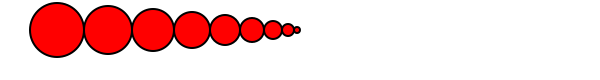

In [11]:
SVG('''<svg width="600" height="80">''' +
    ''.join([
        f'''<circle
        cx="{(30 + 3*i) * (10 - i)}"
        cy="30"
        r="{3. * float(i)}"
        fill="red"
        stroke-width="2"
        stroke="black">
        </circle>''' for i in range(10)]) +
    '''</svg>''')

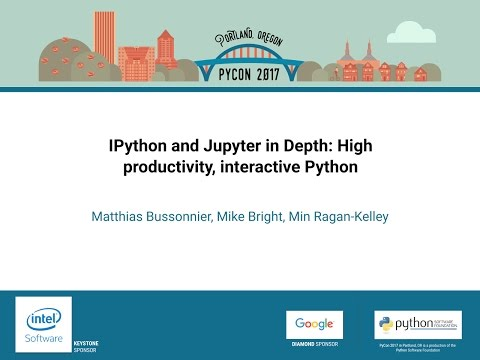

In [12]:
YouTubeVideo('VQBZ2MqWBZI')

---
# 1.2 Getting started with exploratory data analysis in the Jupyter Notebook

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")

In [15]:
df = pd.read_csv(url, index_col='Date',
                 parse_dates=True, dayfirst=True)

In [16]:
df.head(12)

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0
2013-01-03,00:00,69,2,21,6,22,1,0,0
2013-01-04,00:00,80,0,22,4,16,0,125,0
2013-01-05,00:00,52,4,19,3,12,0,97,0
2013-01-06,00:00,37,0,23,46,8,0,47,0
2013-01-07,00:00,159,0,81,211,60,0,200,0
2013-01-08,00:00,327,0,156,393,66,0,335,0
2013-01-09,00:00,332,0,155,446,84,0,366,0


In [17]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


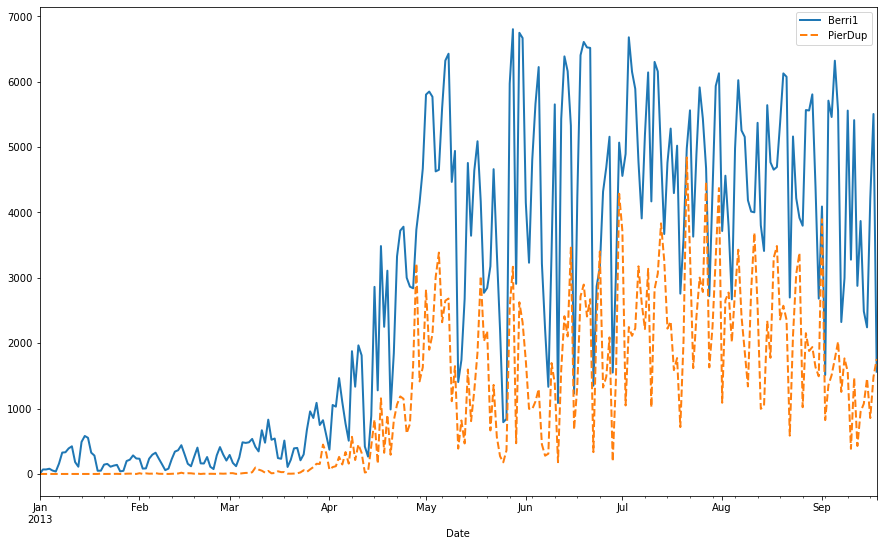

In [18]:
df[["Berri1", "PierDup"]].plot(figsize=(15, 9), style=["-", "--"], lw=2)
plt.show()

In [19]:
df.index.weekday

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            ...
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
           dtype='int64', name='Date', length=261)

In [20]:
df_week = df.groupby(df.index.weekday).sum()
df_week

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
0,106826,51646,68087,129982,69767,44500,119211,72883
1,117244,54656,76974,141217,74299,40679,123533,76559
2,120434,59604,79033,145860,80437,42564,125173,79501
3,115193,52340,76273,141424,73668,36349,120684,74540
4,105701,44252,71605,127526,64385,36850,118556,71426
5,75754,27226,45947,79743,35544,46149,97143,56438
6,74873,29181,40812,75746,37620,53812,100735,53798


/home/leo/Conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


(0.0, 151791.7)

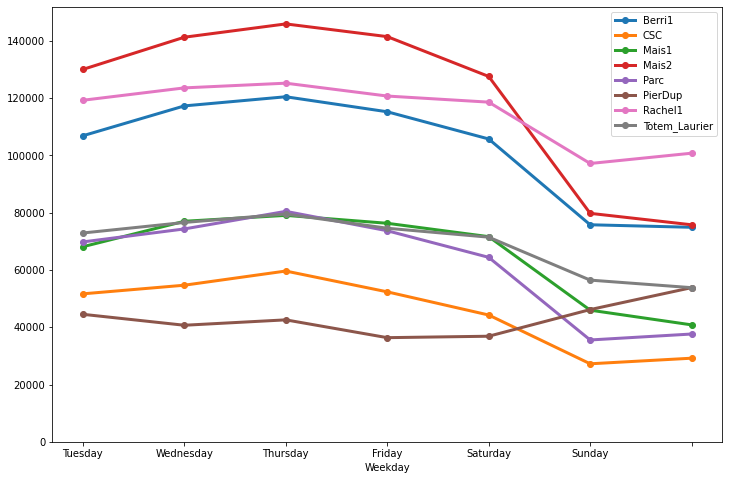

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_week.plot(style="-o", lw=3, ax=ax)
ax.set_xlabel("Weekday")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday",
                    "Friday", "Saturday", "Sunday"])
ax.set_ylim(0)

In [22]:
from ipywidgets import interact

In [23]:
@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df["Berri1"].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(0, 7000)
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

---
# 1.3 Introducing the multidimensional array in NumPy for fast array computations

In [24]:
import random

In [25]:
n = 1000000
x = [random.random() for _ in range(n)]
y = [random.random() for _ in range(n)]
x[:3], y[:3]

([0.6639765564966482, 0.11024075597651195, 0.4198141292459193],
 [0.7575718816998872, 0.27990935390647564, 0.2588901093397208])

In [26]:
z = [x[i] + y[i] for i in range(n)]
z[:3]

[1.4215484381965355, 0.3901501098829876, 0.6787042385856401]

In [27]:
%timeit [x[i] + y[i] for i in range(n)]

73.4 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
xa = np.array(x)
ya = np.array(y)
xa[:3], ya[:3]

(array([0.66397656, 0.11024076, 0.41981413]),
 array([0.75757188, 0.27990935, 0.25889011]))

In [29]:
za = xa + ya
za[:3]

array([1.42154844, 0.39015011, 0.67870424])

In [30]:
%timeit xa + ya

722 µs ± 7.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit sum(x)

3.17 ms ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit np.sum(xa)

180 µs ± 2.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [33]:
d = [abs(x[i] - y[j]) for i in range(1000) for j in range(1000)]
d[:3]

[0.09359532520323899, 0.3840672025901726, 0.40508644715692743]

In [35]:
da = np.abs(xa[:1000, np.newaxis] - ya[:1000])

In [36]:
%timeit [abs(x[i] - y[j]) for i in range(1000) for j in range(1000)]

101 ms ± 780 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%timeit np.abs(xa[:1000, np.newaxis] - ya[:1000])

1.09 ms ± 3.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Broadcasting:

In [38]:
a = np.array((3, 4, 5))
b = np.array((0, -1, 1))
a[:, np.newaxis] + b

array([[3, 2, 4],
       [4, 3, 5],
       [5, 4, 6]])

---
# 1.4 Creating an IPython extension with custom magic commands

In [39]:
from IPython.core.magic import (register_line_magic, register_cell_magic)

In [40]:
@register_line_magic
def hello(line):
    if line == "french":
        print("Salut tout le monde!")
    else:
        print("Hello world!")

In [41]:
%hello

Hello world!


In [42]:
%hello french

Salut tout le monde!


In [43]:
from io import StringIO

In [44]:
@register_cell_magic
def csv(line, cell):
    sio = StringIO(cell)
    return pd.read_csv(sio)

In [45]:
%%csv
col1,col2,col3
1,2,3
4,5,6
7,8,9

,col1,col2,col3
0,1,2,3
1,4,5,6
2,7,8,9


In [46]:
df = _
df.describe()

,col1,col2,col3
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [47]:
%%writefile csvmagic.py
import pandas as pd
from io import StringIO

def csv(line, cell):
    sio = StringIO(cell)
    return pd.read_csv(sio)

def load_ipython_extension(ipython):
    """This function is called when the extension is loaded.
    It accepts an IPython InteractiveShell instance. We can register
    the magic with the `register_magic_function` method of the shell instance."""
    ipython.register_magic_function(csv, "cell")

Overwriting csvmagic.py


In [48]:
%load_ext csvmagic

In [49]:
%%csv
col1,col2,col3
1,2,3
4,5,6
7,8,9

,col1,col2,col3
0,1,2,3
1,4,5,6
2,7,8,9


InteractiveShell:

In [50]:
interactive_shell = get_ipython()

In [51]:
interactive_shell.write("123")

123

/home/leo/Conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: InteractiveShell.write() is deprecated, use sys.stdout instead
  """Entry point for launching an IPython kernel.


# 1.5 Mastering IPython's configuration system

In [52]:
%%writefile random_magics.py
import numpy as np
from traitlets import Int, Float, Unicode, Bool
from IPython.core.magic import (Magics, magics_class, line_magic)

Overwriting random_magics.py


In [53]:
%%writefile random_magics.py -a

@magics_class
class RandomMagics(Magics):
    text = Unicode(u'{n}', config=True)
    max = Int(1000, config=True)
    seed = Int(0, config=True)

Appending to random_magics.py


In [54]:
%%writefile random_magics.py -a

    def __init__(self, shell):
        super(RandomMagics, self).__init__(shell)
        self._rng = np.random.RandomState(self.seed or None)

Appending to random_magics.py


In [55]:
%%writefile random_magics.py -a

    @line_magic
    def random(self, line):
        return self.text.format(n=self._rng.randint(self.max))

Appending to random_magics.py


In [56]:
%%writefile random_magics.py -a

def load_ipython_extension(ipython):
    ipython.register_magics(RandomMagics)

Appending to random_magics.py


In [57]:
%load_ext random_magics

In [58]:
%random

'561'

In [59]:
%random

'445'